# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
image_data= "/content/drive/MyDrive/defungi"

In [4]:
#Create Files_Name
#image_data='defungi'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,H1
1,H6
2,H3
3,H5
4,H2


In [5]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,/content/drive/MyDrive/defungi/H3/H3_3a_5.jpg,H3
1,/content/drive/MyDrive/defungi/H3/H3_6a_11.jpg,H3
2,/content/drive/MyDrive/defungi/H1/H1_113c_12.jpg,H1
3,/content/drive/MyDrive/defungi/H1/H1_25c_7.jpg,H1
4,/content/drive/MyDrive/defungi/H2/H2_23d_2.jpg,H2
...,...,...
9109,/content/drive/MyDrive/defungi/H6/H6_38a_4.jpg,H6
9110,/content/drive/MyDrive/defungi/H2/H2_25b_12.jpg,H2
9111,/content/drive/MyDrive/defungi/H2/H2_15a_11.jpg,H2
9112,/content/drive/MyDrive/defungi/H1/H1_31a_25.jpg,H1


# Visualization

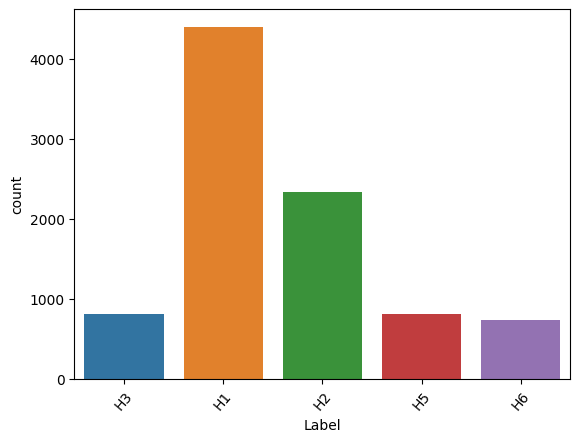

In [6]:
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 50);

# Split Train and Test Dataset

In [7]:
train_data_dir =image_data
batch_size = 32
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)

Found 9114 files belonging to 5 classes.
Using 7292 files for training.
Found 9114 files belonging to 5 classes.
Using 1822 files for validation.


In [8]:
class_names = train.class_names
class_names

['H1', 'H2', 'H3', 'H5', 'H6']

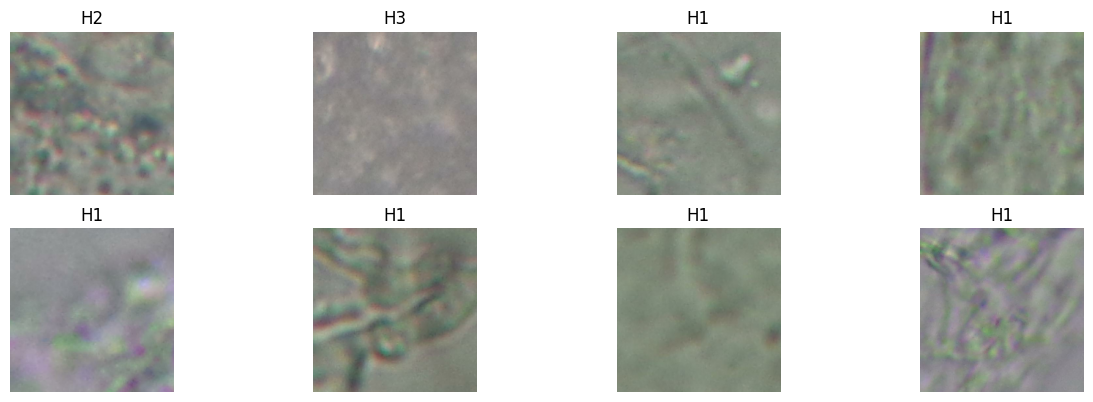

In [9]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Model

In [22]:
base_model = tf.keras.applications.VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
keras_model=keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten())
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(5,activation=tf.nn.softmax))
keras_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_1 (Dropout)         (None, 25088)             0         
                                                                 
 dense_1 (Dense)             (None, 5)                 125445    
                                                                 
Total params: 14840133 (56.61 MB)
Trainable params: 125445 (490.02 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


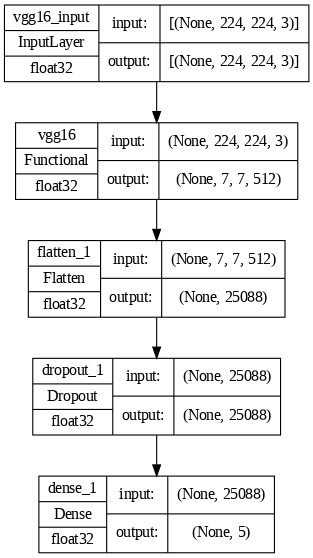

In [23]:
tf.keras.utils.plot_model(keras_model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=80)

In [24]:
checkpoint =ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [25]:
early_stopping =EarlyStopping(patience=5, restore_best_weights=True)

In [26]:
keras_model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=keras_model.fit_generator(train,epochs=20,validation_data=validation,callbacks=[checkpoint,early_stopping])

Epoch 1/20
228/228 [==============================] - 36s 154ms/step - loss: 4.5087 - accuracy: 0.5746 - val_loss: 1.7162 - val_accuracy: 0.7602
Epoch 2/20
228/228 [==============================] - 36s 156ms/step - loss: 2.9375 - accuracy: 0.6876 - val_loss: 1.2909 - val_accuracy: 0.7859
Epoch 3/20
228/228 [==============================] - 36s 158ms/step - loss: 2.4822 - accuracy: 0.7394 - val_loss: 1.9831 - val_accuracy: 0.7761
Epoch 4/20
228/228 [==============================] - 40s 172ms/step - loss: 2.3269 - accuracy: 0.7578 - val_loss: 1.3465 - val_accuracy: 0.8282
Epoch 5/20
228/228 [==============================] - 37s 162ms/step - loss: 2.1450 - accuracy: 0.7759 - val_loss: 1.2985 - val_accuracy: 0.8469
Epoch 6/20
228/228 [==============================] - 38s 163ms/step - loss: 1.8904 - accuracy: 0.7932 - val_loss: 1.1031 - val_accuracy: 0.8644
Epoch 7/20
228/228 [==============================] - 38s 165ms/step - loss: 1.8671 - accuracy: 0.8076 - val_loss: 0.9607 - val_ac

In [27]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

57/57 [==============================] - 8s 129ms/step - loss: 0.9607 - accuracy: 0.8847
Test Loss = 0.9607056379318237
Test Accuracy = 0.884742021560669


In [28]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,4.508655,0.574602,1.716222,0.760154
1,2.937476,0.687603,1.290851,0.785950
2,2.482163,0.739441,1.983091,0.776070
3,2.326861,0.757817,1.346518,0.828211
4,2.145005,0.775919,1.298547,0.846872
5,1.890380,0.793198,1.103088,0.864435
6,1.867064,0.807597,0.960706,0.884742
7,1.857499,0.812946,1.075953,0.886389
8,1.745093,0.822134,1.135811,0.857849
9,1.817647,0.821448,0.969396,0.888584


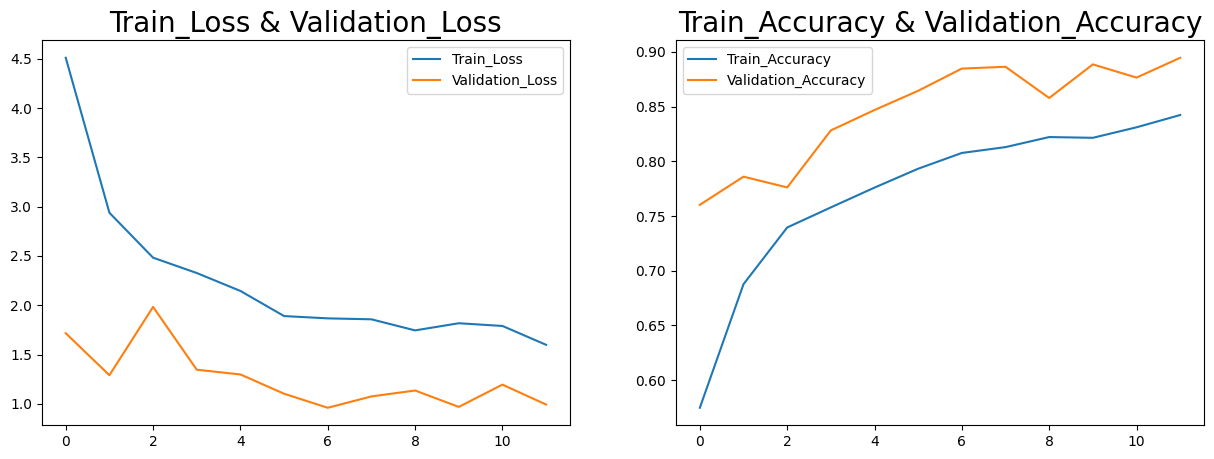

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [30]:
X_val,y_val,y_pred=[],[],[]
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=keras_model.predict(np.array(X_val))
for i in predictions:
    y_pred.append(np.argmax(i))
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

57/57 [==============================] - 7s 125ms/step


,Actual,Prediction
0,1,1
1,0,0
2,1,0
3,0,0
4,1,1
...,...,...
1817,0,0
1818,0,0
1819,1,1
1820,1,1


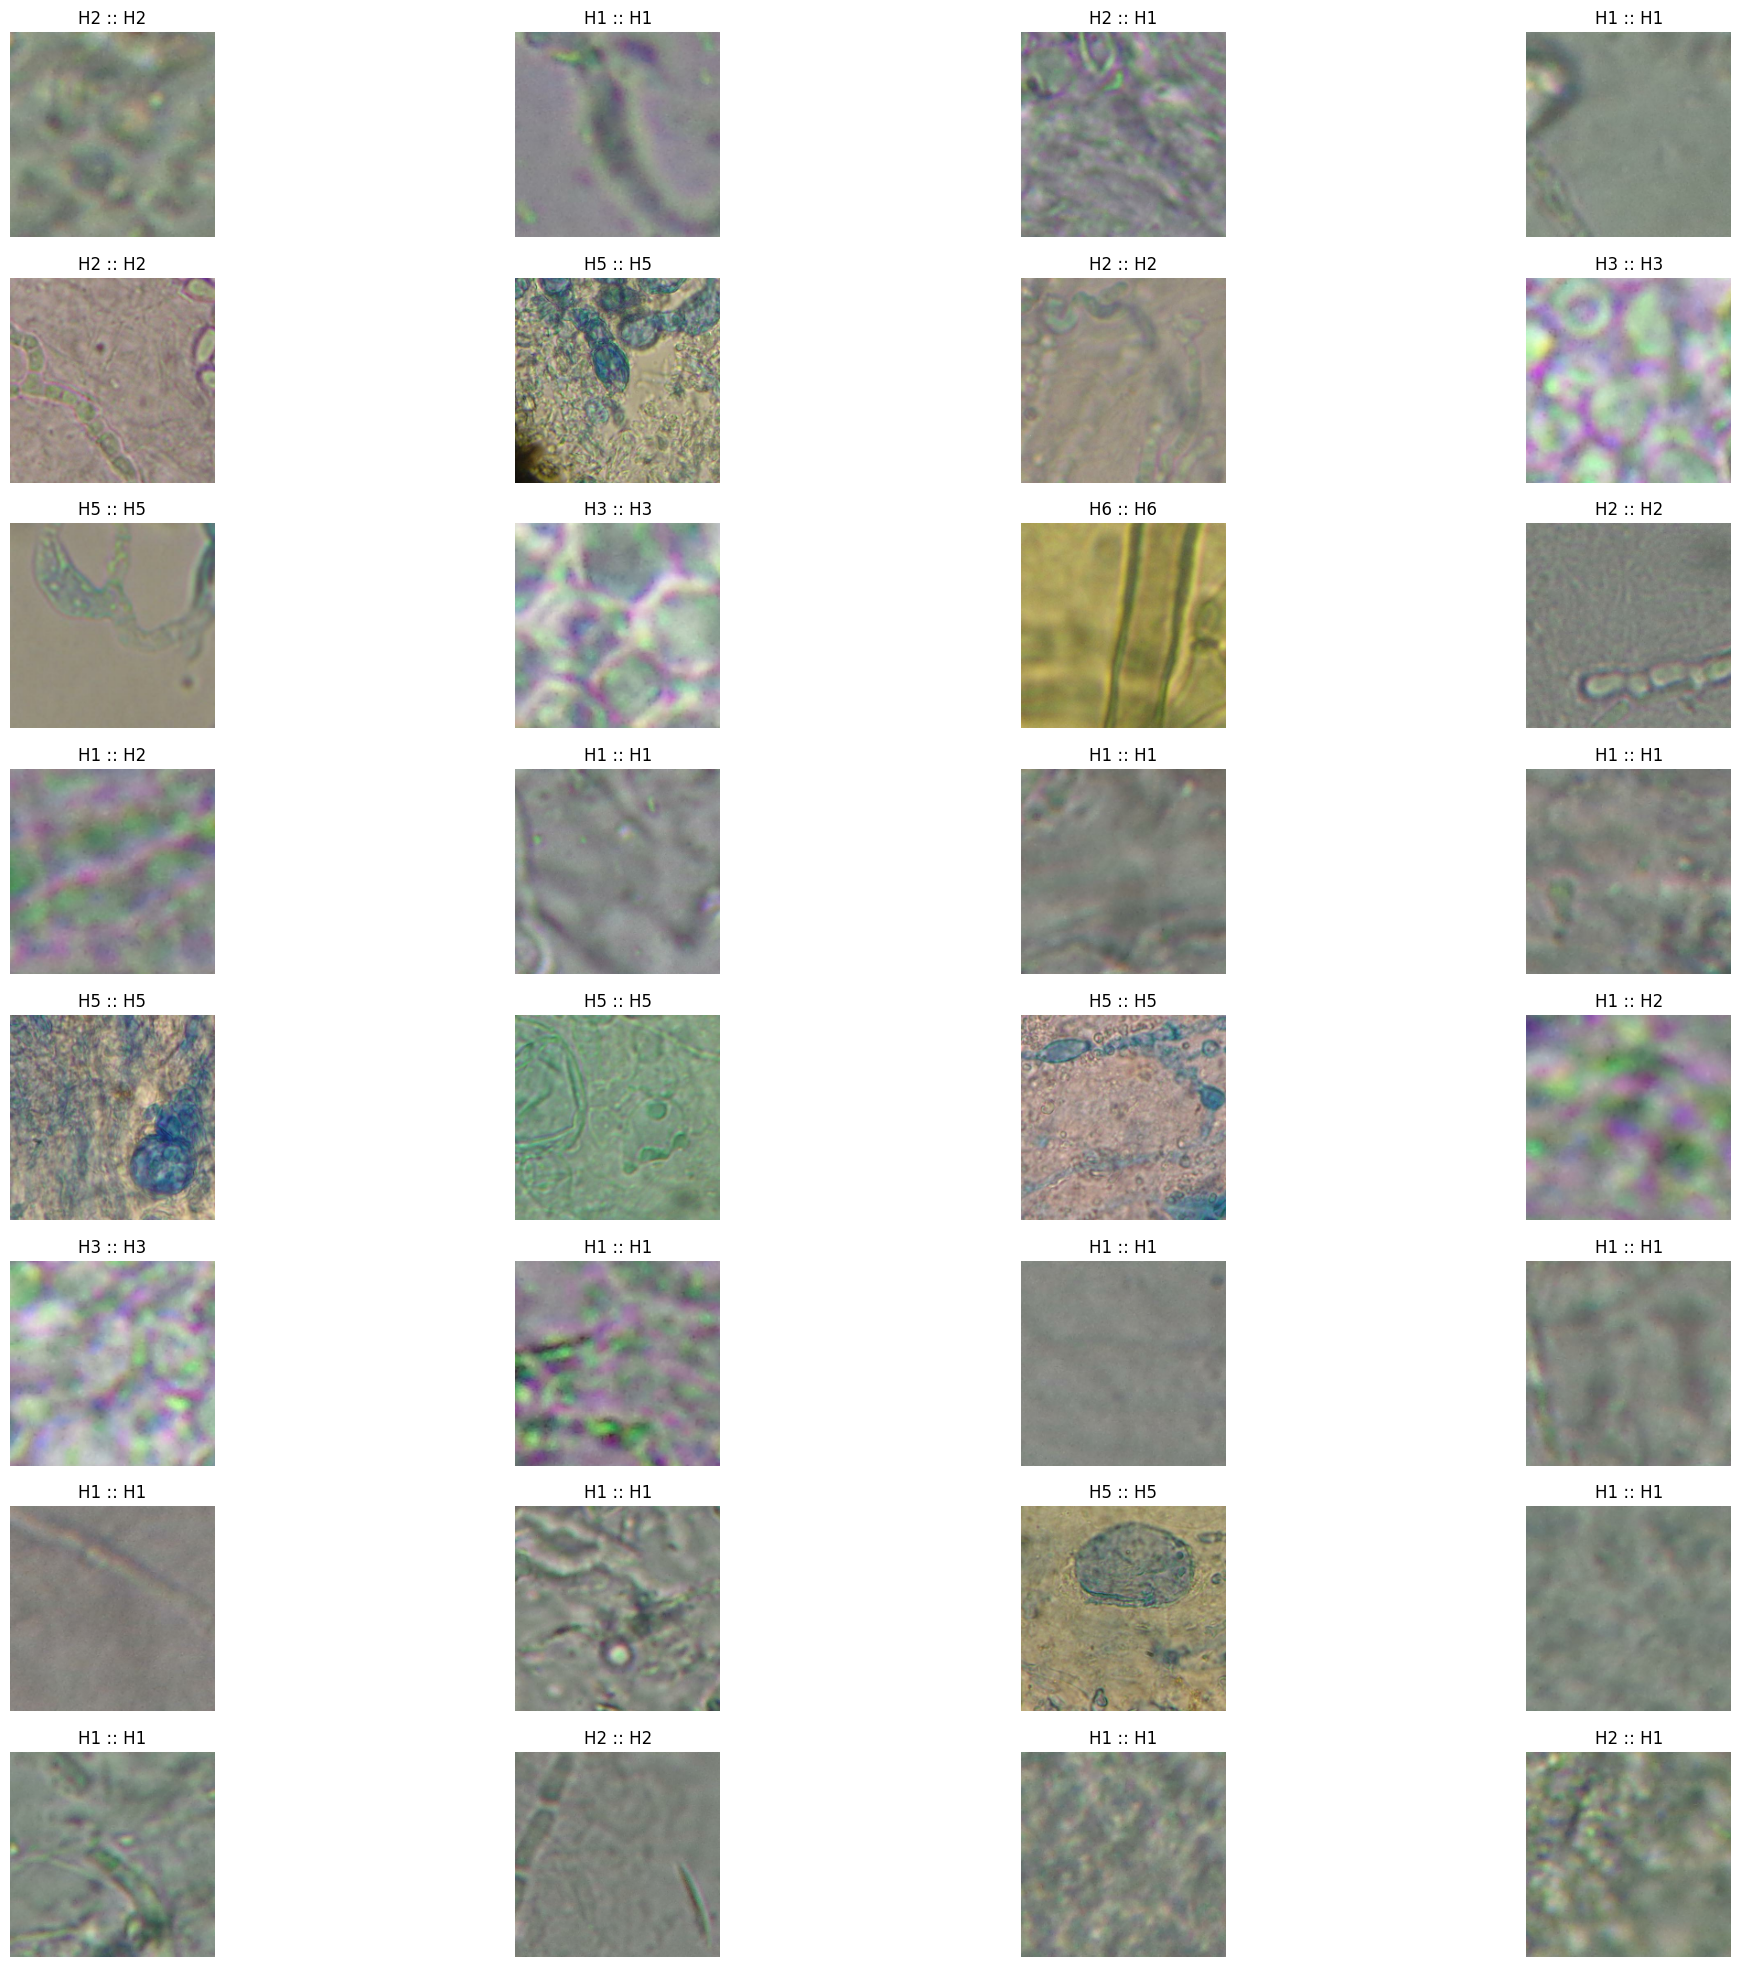

In [31]:
plt.figure(figsize=(25,25))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i]]}')
    plt.axis("off")

# Confusion_matrix

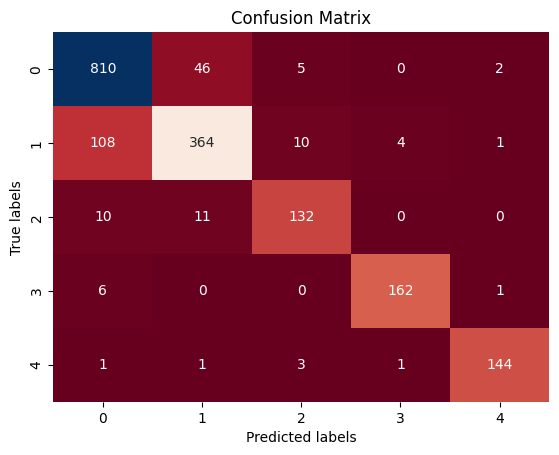

array([[810,  46,   5,   0,   2],
       [108, 364,  10,   4,   1],
       [ 10,  11, 132,   0,   0],
       [  6,   0,   0, 162,   1],
       [  1,   1,   3,   1, 144]])

In [32]:
ax= plt.subplot()
CM = confusion_matrix(y_val,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()
CM

In [33]:
Acc = accuracy_score(y_val,y_pred)
print("accuracy is: {0:.3f}%".format(Acc * 100))

accuracy is: 88.474%
